# Online News Popularity Regression
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 
In this part, you are going to work with the __News Popularity Prediction__ dataset. You will implement a regression model using the __Scikit-Learn__ package to predict the popularity of new articles (the number of times they will be shared online) based on about 60 features. You are expected:


### Part a)
Perform exploratory data analysis on the dataset.

In [203]:
# Read Data
onp = pd.read_csv('Dataset/OnlineNewsPopularity.csv')
onp.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [204]:
onp.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

In [205]:
onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [206]:
onp.shape

(39644, 61)

In [207]:
onp.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [208]:
# Correcting name of columns
cols = np.array([attr.strip() for attr in onp.columns.values], dtype=object)
onp.columns = cols

In [209]:
# Remove duplicates and remove non_predictive features
onp.drop_duplicates(inplace=True)
onp.drop(['url', 'timedelta'], axis=1, inplace=True)
onp.shape

(39644, 59)

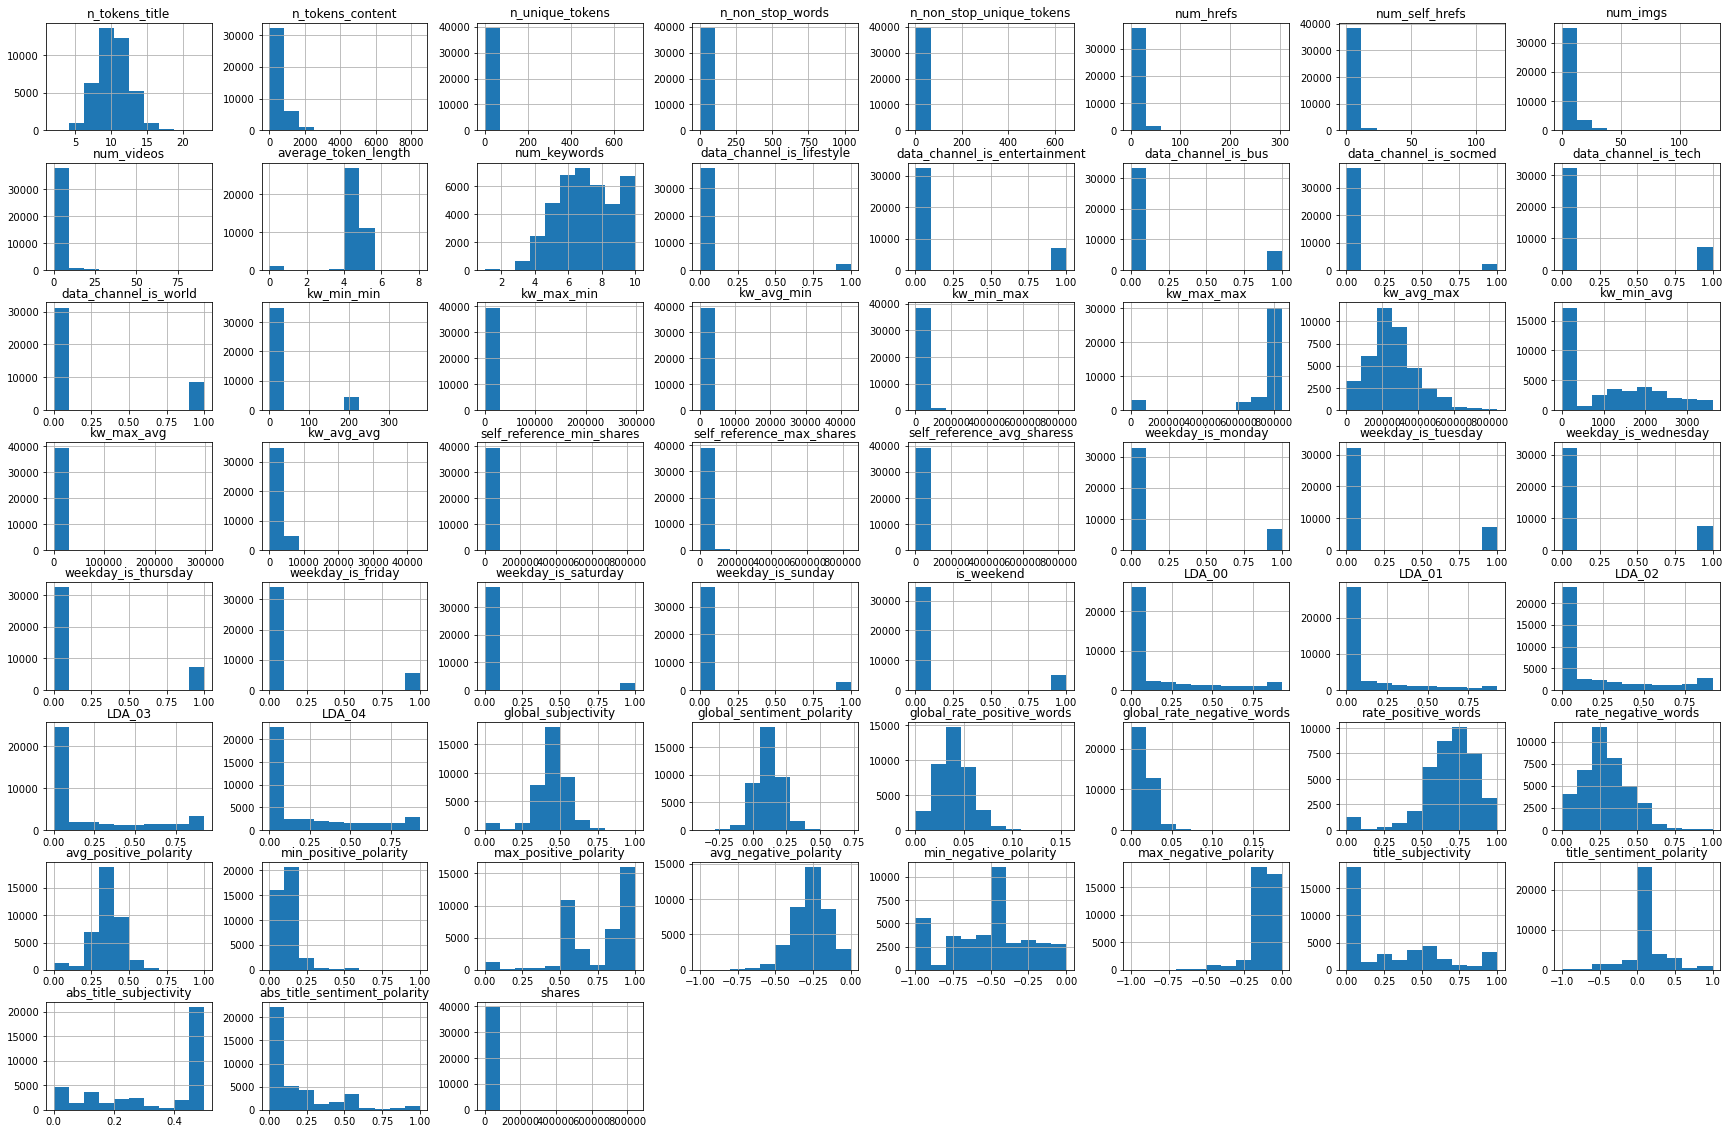

In [210]:
onp.hist(figsize=(30, 20))
plt.show()

In [211]:
corr_matrix = onp.corr()

In [212]:
pd.set_option('display.max_columns', None)
corr_matrix[corr_matrix > 0.8]

n_tokens_title  n_tokens_content  \
n_tokens_title                            1.0               NaN   
n_tokens_content                          NaN               1.0   
n_unique_tokens                           NaN               NaN   
n_non_stop_words                          NaN               NaN   
n_non_stop_unique_tokens                  NaN               NaN   
num_hrefs                                 NaN               NaN   
num_self_hrefs                            NaN               NaN   
num_imgs                                  NaN               NaN   
num_videos                                NaN               NaN   
average_token_length                      NaN               NaN   
num_keywords                              NaN               NaN   
data_channel_is_lifestyle                 NaN               NaN   
data_channel_is_entertainment             NaN               NaN   
data_channel_is_bus                       NaN               NaN   
data_channel_is_socmed                    NaN               NaN   
data_channel_is_tech                      NaN               NaN   
data_channel_is_world                     NaN               NaN   
kw_min_min                                NaN               NaN   
kw_max_min                                NaN               NaN   
kw_avg_min                                NaN               NaN   
kw_min_max                                NaN               NaN   
kw_max_max                                NaN               NaN   
kw_avg_max                                NaN               NaN   
kw_min_avg                                NaN               NaN   
kw_max_avg                                NaN               NaN   
kw_avg_avg                                NaN               NaN   
self_reference_min_shares                 NaN               NaN   
self_reference_max_shares                 NaN               NaN   
self_reference_avg_sharess                NaN               NaN   
weekday_is_monday                         NaN               NaN   
weekday_is_tuesday                        NaN               NaN   
weekday_is_wednesday                      NaN               NaN   
weekday_is_thursday                       NaN               NaN   
weekday_is_friday                         NaN               NaN   
weekday_is_saturday                       NaN               NaN   
weekday_is_sunday                         NaN               NaN   
is_weekend                                NaN               NaN   
LDA_00                                    NaN               NaN   
LDA_01                                    NaN               NaN   
LDA_02                                    NaN               NaN   
LDA_03                                    NaN               NaN   
LDA_04                                    NaN               NaN   
global_subjectivity                       NaN               NaN   
global_sentiment_polarity                 NaN               NaN   
global_rate_positive_words                NaN               NaN   
global_rate_negative_words                NaN               NaN   
rate_positive_words                       NaN               NaN   
rate_negative_words                       NaN               NaN   
avg_positive_polarity                     NaN               NaN   
min_positive_polarity                     NaN               NaN   
max_positive_polarity                     NaN               NaN   
avg_negative_polarity                     NaN               NaN   
min_negative_polarity                     NaN               NaN   
max_negative_polarity                     NaN               NaN   
title_subjectivity                        NaN               NaN   
title_sentiment_polarity                  NaN               NaN   
abs_title_subjectivity                    NaN               NaN   
abs_title_sentiment_polarity              NaN               NaN   
shares                                    NaN               NaN   

          

/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_62810/1093312258.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))


<AxesSubplot:>

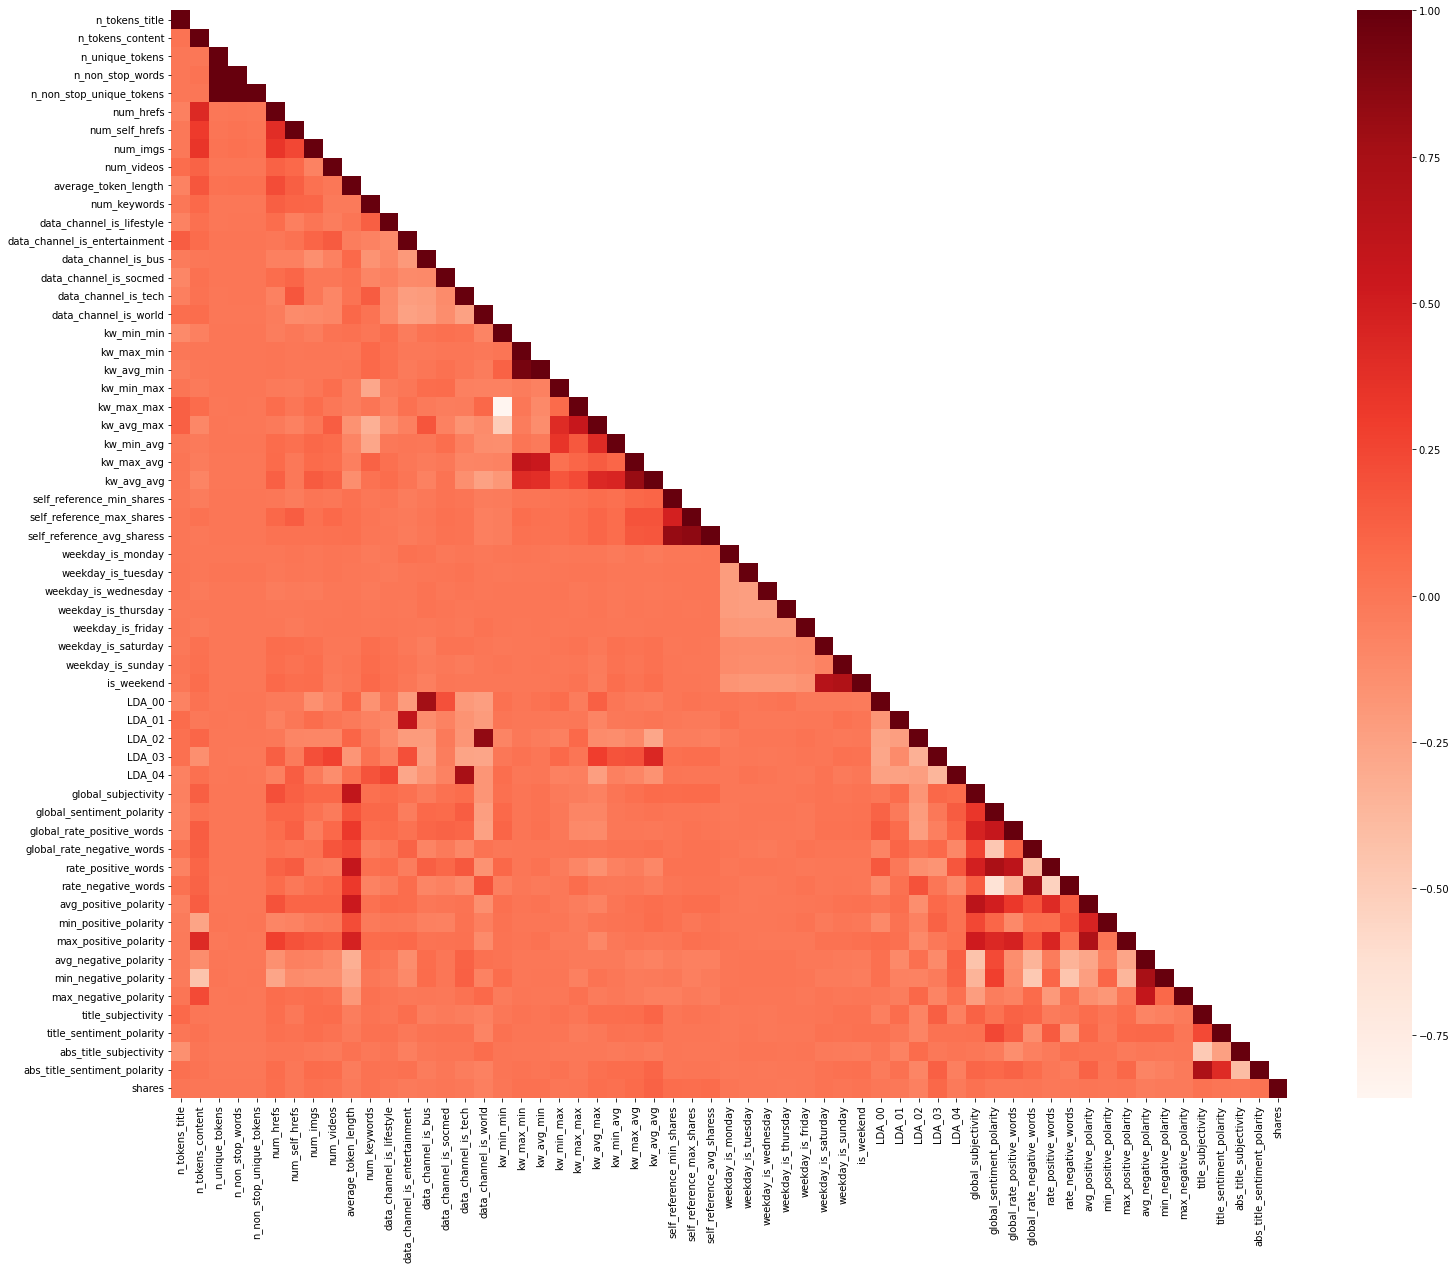

In [213]:
plt.figure(figsize=(25, 20))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
sns.heatmap(corr_matrix, cmap='Reds')

In [214]:
# Remove highly correlated fearues
onp.drop(['n_non_stop_unique_tokens', 'n_non_stop_words', 'kw_avg_min'], axis=1, inplace=True)

In [215]:
# Remove item with no words
onp = onp[onp['n_tokens_content'] != 0]
onp.shape

(38463, 56)

In [216]:
onp.describe()

n_tokens_title  n_tokens_content  n_unique_tokens     num_hrefs  \
count    38463.000000      38463.000000     38463.000000  38463.000000   
mean        10.382419        563.295375         0.565049     11.217872   
std          2.113800        468.299538         3.573022     11.340580   
min          2.000000         18.000000         0.114964      0.000000   
25%          9.000000        259.000000         0.477419      5.000000   
50%         10.000000        423.000000         0.542986      8.000000   
75%         12.000000        729.000000         0.611111     14.000000   
max         23.000000       8474.000000       701.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    38463.000000  38463.000000  38463.000000          38463.000000   
mean         3.394769      4.563061      1.263786              4.687892   
std          3.869773      8.295365      4.164896              0.283231   
min          0.000000      0.000000      0.000000              3.600000   
25%          1.000000      1.000000      0.000000              4.496250   
50%          3.000000      1.000000      0.000000              4.674121   
75%          4.000000      4.000000      1.000000              4.861901   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  38463.000000               38463.000000                   38463.000000   
mean       7.215012                   0.054000                       0.178249   
std        1.916459                   0.226021                       0.382727   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         38463.000000            38463.000000          38463.000000   
mean              0.162104                0.060084              0.190443   
std               0.368551                0.237645              0.392655   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min     kw_min_max  \
count           38463.000000  38463.000000   38463.000000   38463.000000   
mean                0.212360     26.708187    1151.751079   13182.545563   
std                 0.408984     70.278215    3870.494630   56850.480221   
min                 0.000000     -1.000000       0.000000       0.000000   
25%                 0.000000     -1.000000     445.000000       0.000000   
50%                 0.000000     -1.000000     660.000000    1400.000000   
75%                 0.000000      4.000000    1000.000000    7700.000000   
max                 1.000000    377.000000  298400.000000  843300.000000   

          kw_max_max     kw_avg_max    kw_min_avg     kw_max_avg  \
count   38463.000000   38463.000000  38463.000000   38463.000000   
mean   750317.505135  255215.159411   1102.009897    5603.782810   
std    216395.888328  131821.240188   1127.031740    6096.725673   
min         0.000000       0.000000     -1.000000       0.000000   
25%    843300.000000  171300.000000      0.000000    3549.290325   
50%    843300.000000  242080.000000   1009.000000    4311.457071   
75%    843300.000000  326879.464285   2031.249361    5962.421633   
max    843300.000000

In [217]:
# Copy of Data
copy_onp = onp.copy()

In [218]:
onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg

In [219]:
word_features = ['n_tokens_title', 'n_tokens_content', 
                 'n_unique_tokens', 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 'weekday_is_tuesday', 
                     'weekday_is_wednesday', 'weekday_is_thursday',
                     'weekday_is_friday', 'weekday_is_saturday',
                     'weekday_is_sunday', 'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs', 'num_self_hrefs', 'self_reference_min_shares',
                      'self_reference_max_shares', 'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

target = ['shares']

In [111]:
plt.figure(figsize=(20, 8))
plt.subplot(121), sns.scatterplot(x=onp.n_tokens_title, y=onp.shares, color='red', alpha=0.5), plt.title('The number of share based on the number of words in the title')
plt.subplot(122), sns.scatterplot(x=onp.n_tokens_content, y=onp.shares, color='blue', alpha=0.5), plt.title('The number of share based on the number of words in the content')
plt.show()

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg

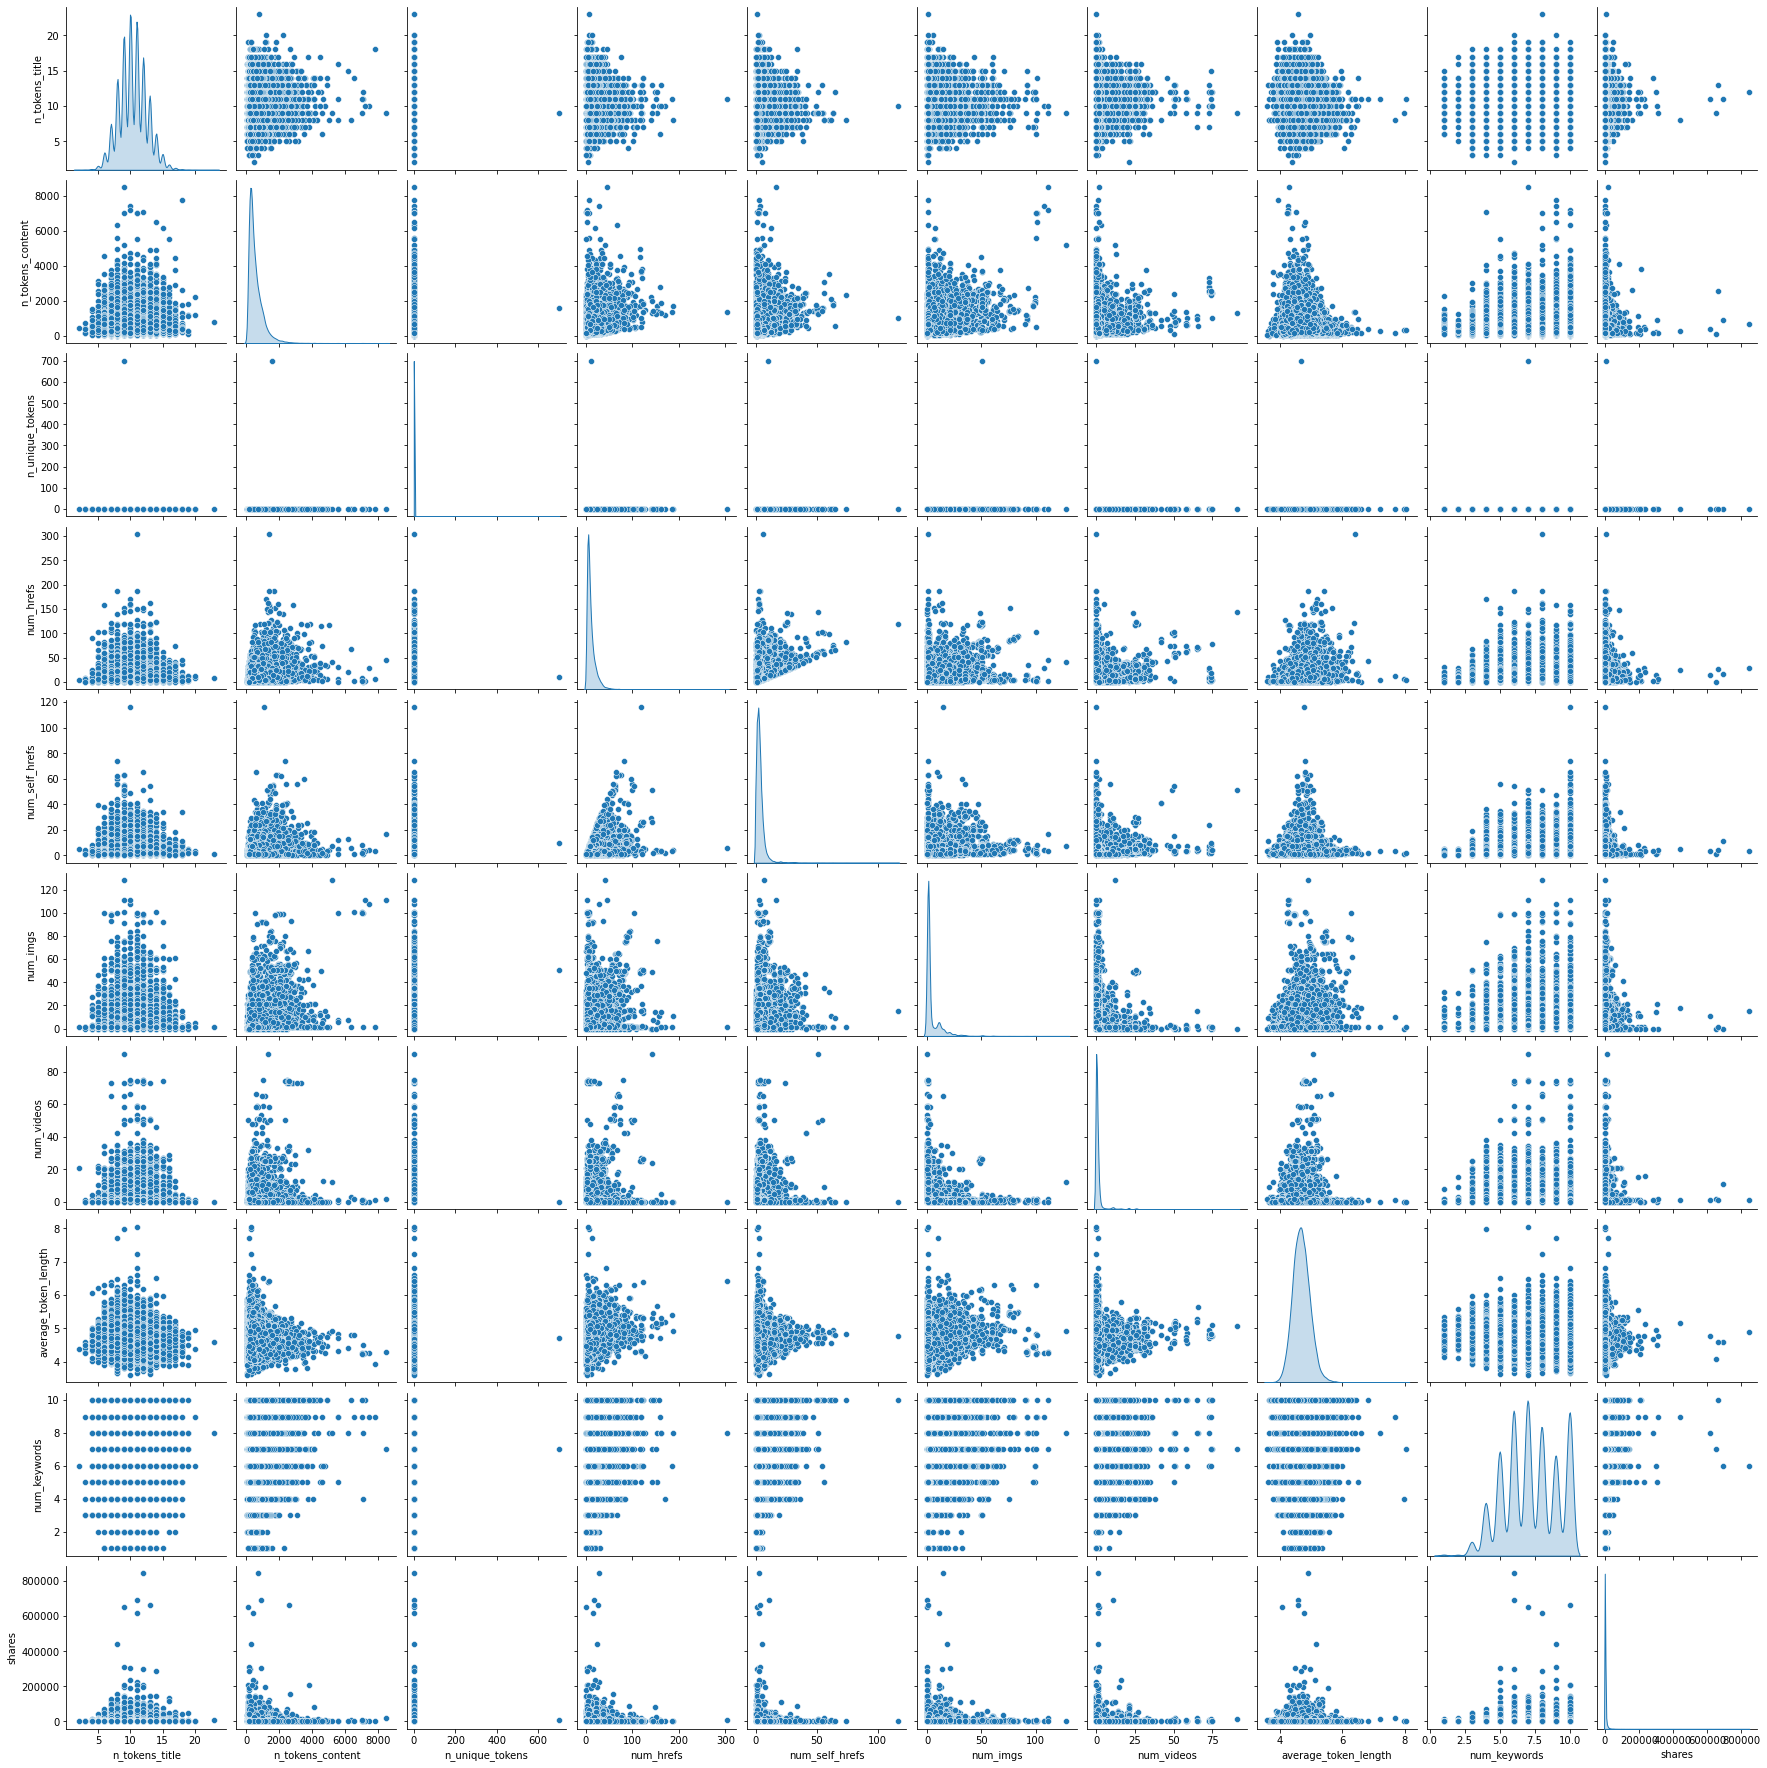

In [112]:
cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

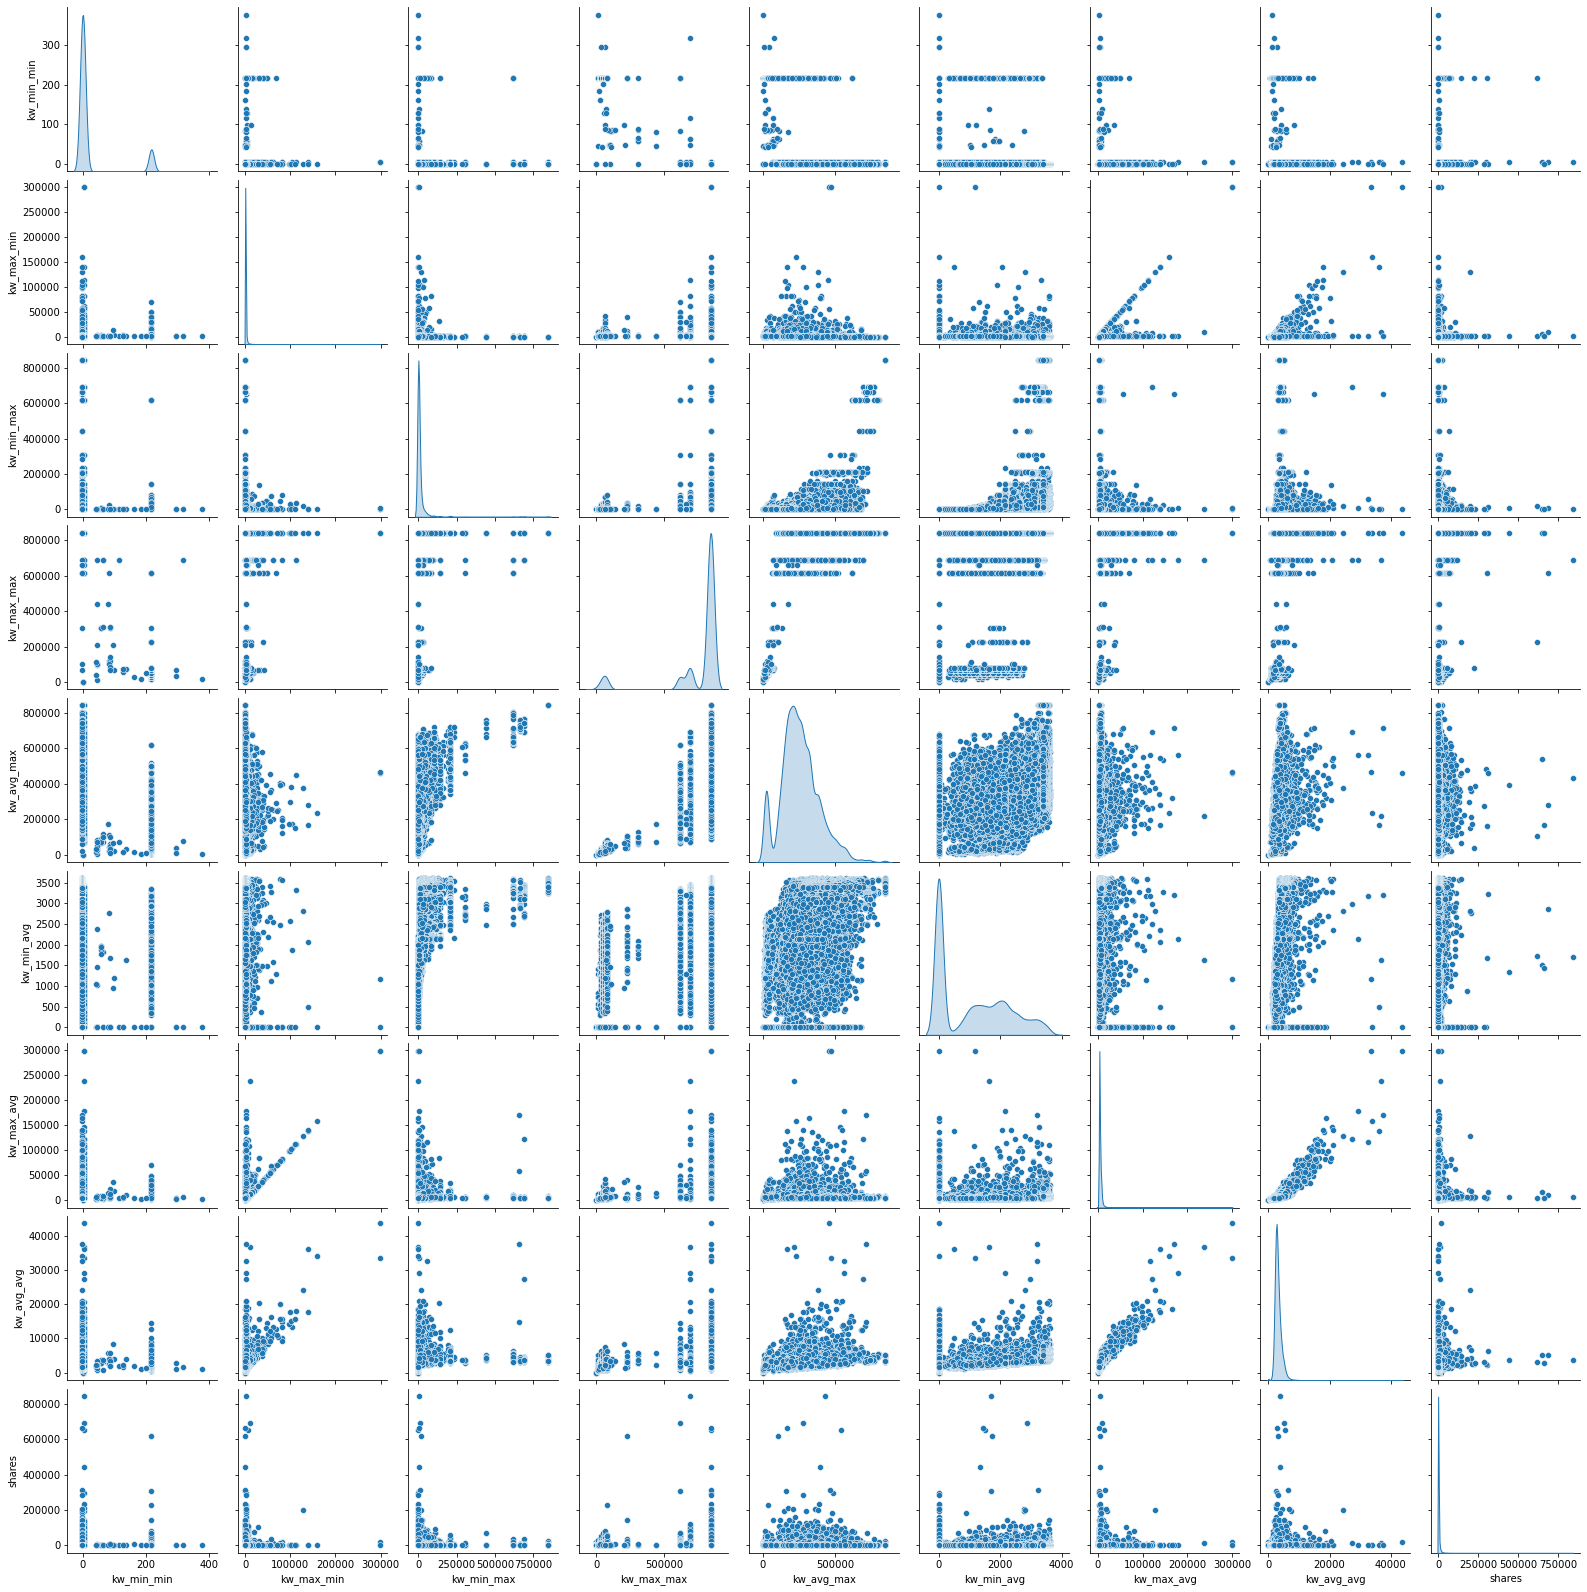

In [114]:
cols = ['kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

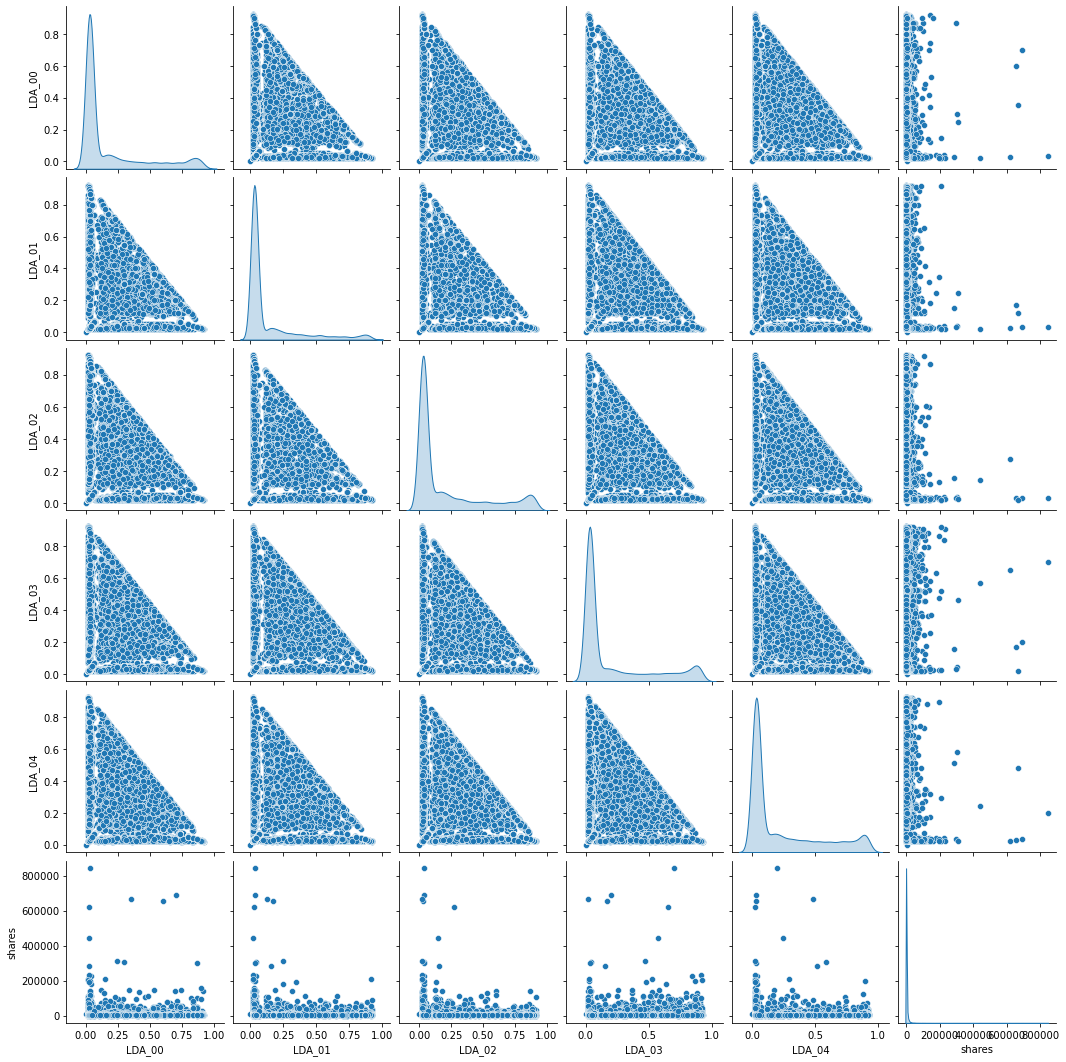

In [116]:
cols = ['LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

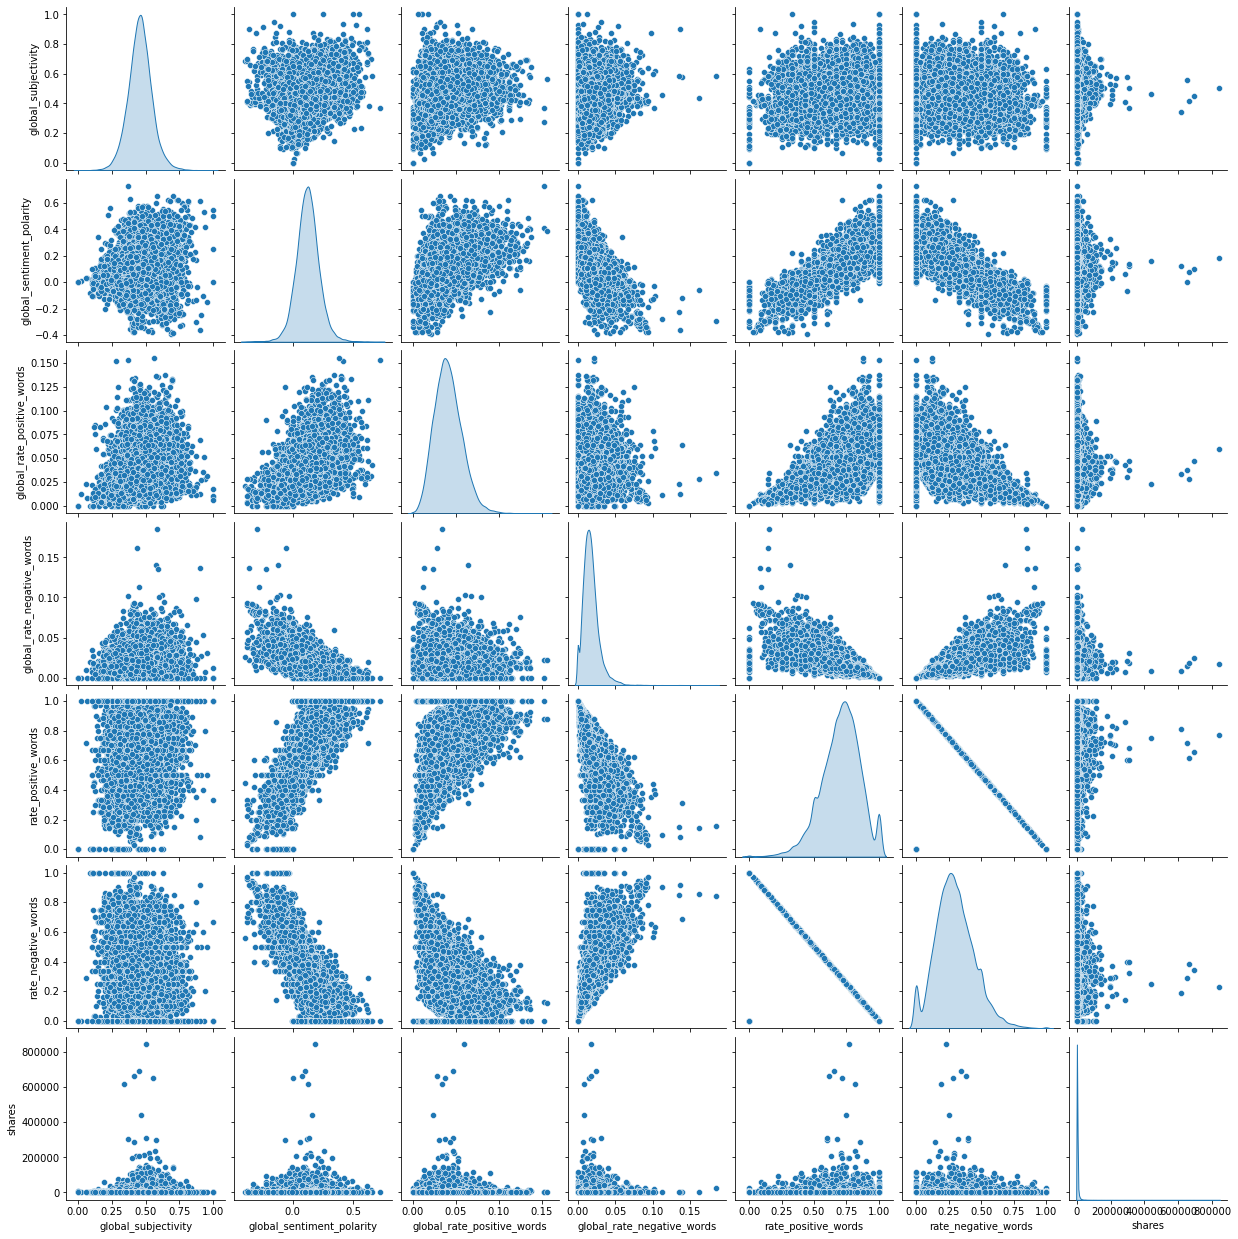

In [118]:
cols = ['global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words','rate_positive_words',
       'rate_negative_words', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

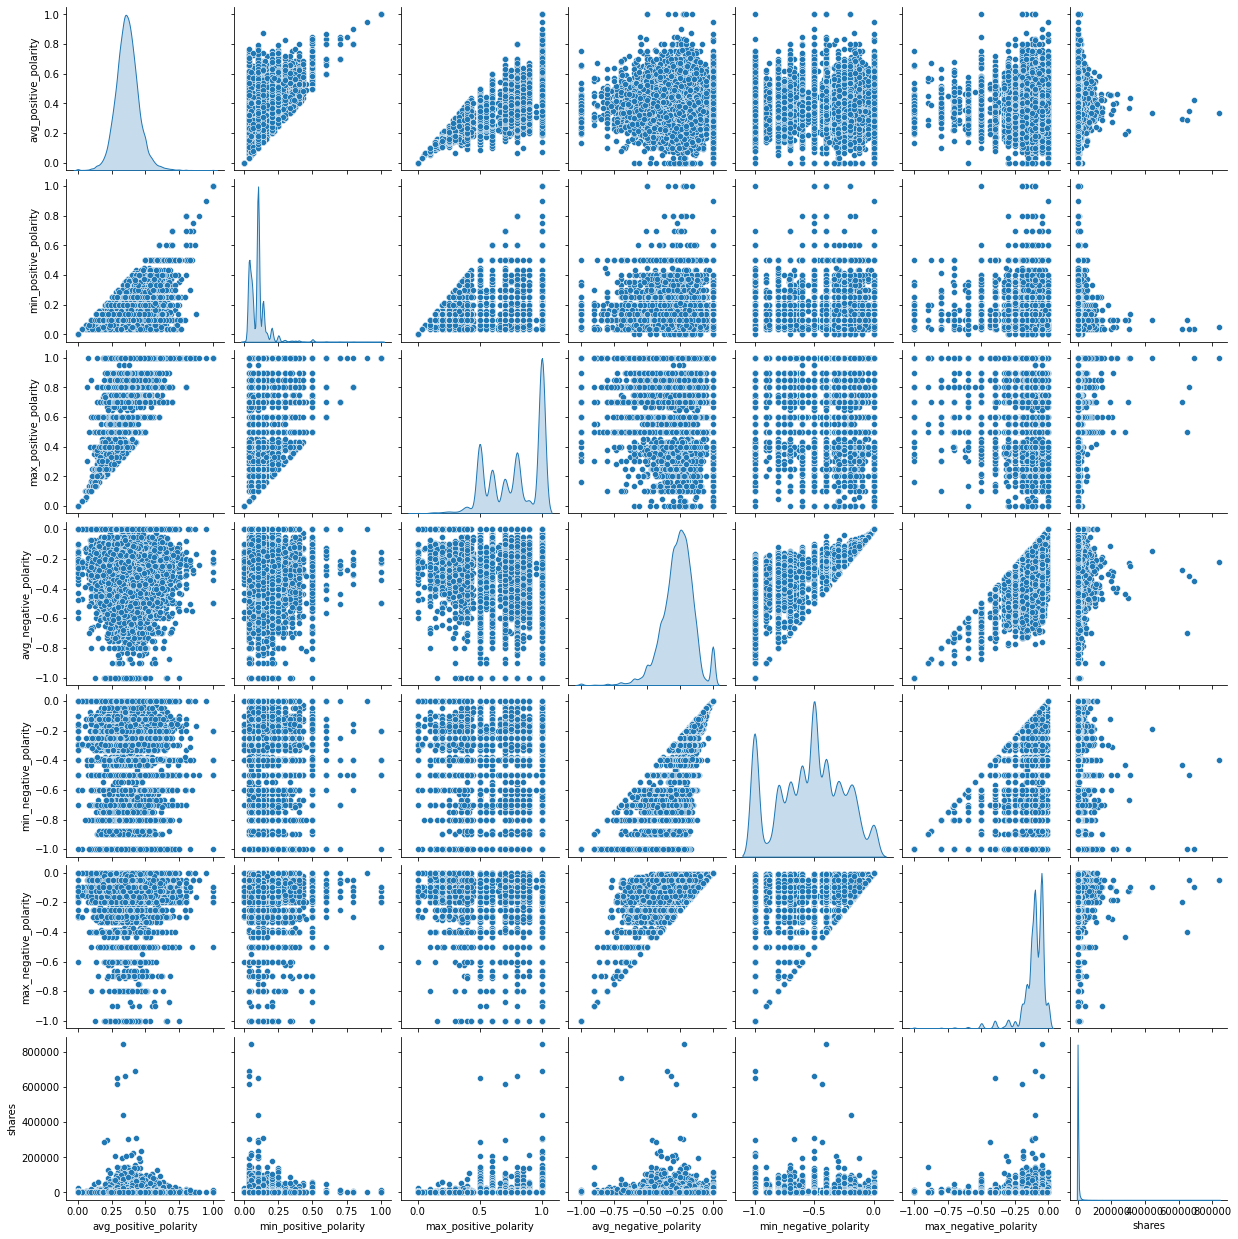

In [119]:
cols = ['avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

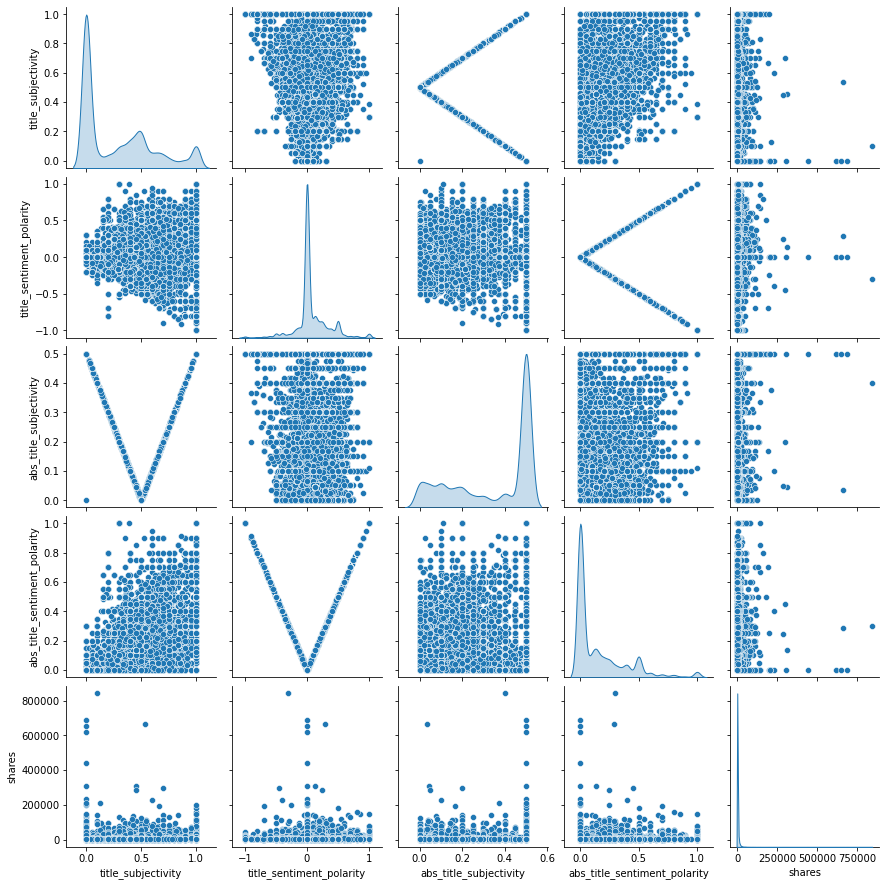

In [120]:
cols = ['title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

sns.pairplot(onp, vars=cols, diag_kind='kde')

<AxesSubplot:>

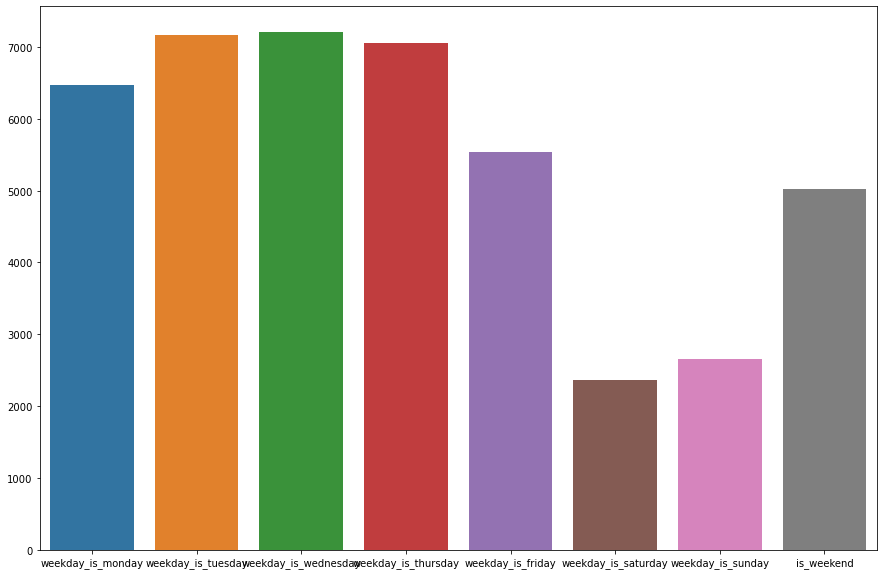

In [155]:
weekdays = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

count = []
for day in weekdays:
    count.append((onp[day] == 1).sum())

plt.figure(figsize=(15, 10))
plt.xlabel('Week Days')
plt.ylabel('Count')
sns.barplot(x=weekdays, y=count)


<AxesSubplot:xlabel='Channels', ylabel='Count'>

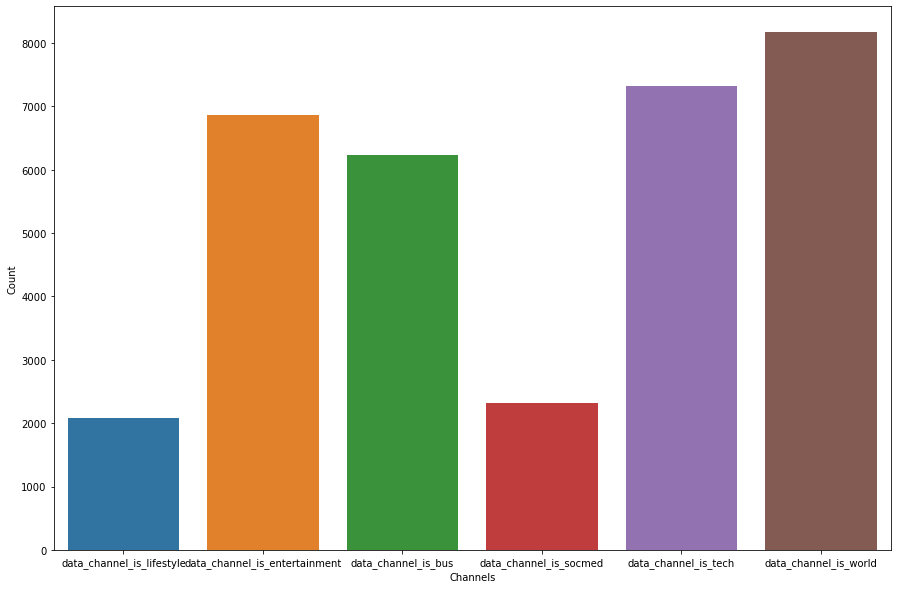

In [158]:
channels = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

count = []
for channel in channels:
    count.append((onp[channel] == 1).sum())

plt.figure(figsize=(15, 10))
plt.xlabel('Channels')
plt.ylabel('Count')
sns.barplot(x=channels, y=count)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


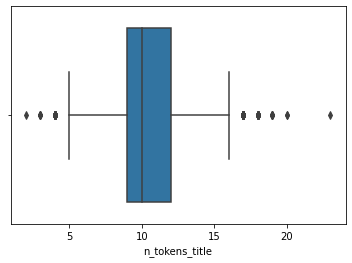

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


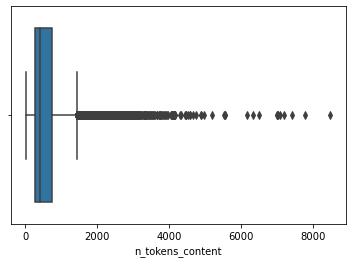

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


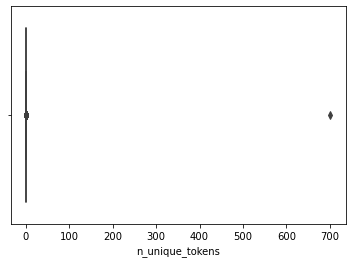

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


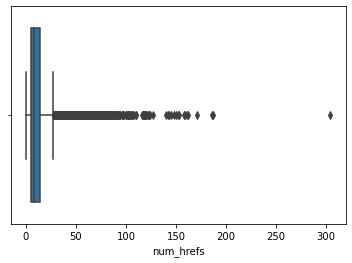

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


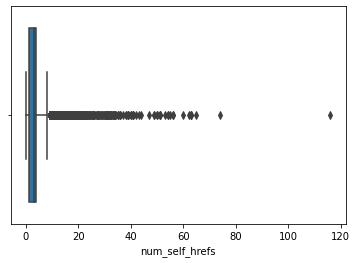

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


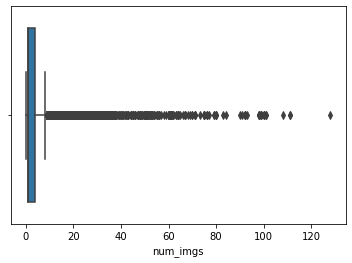

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


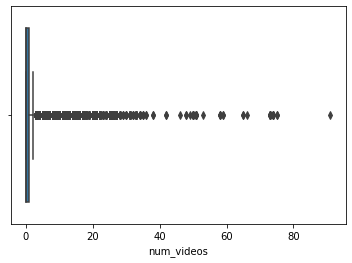

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


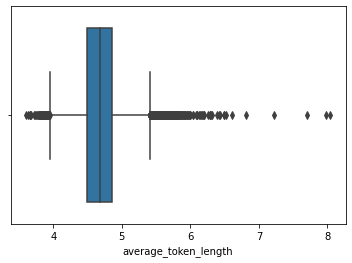

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


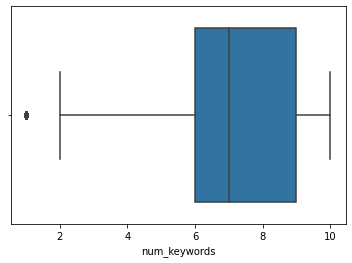

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


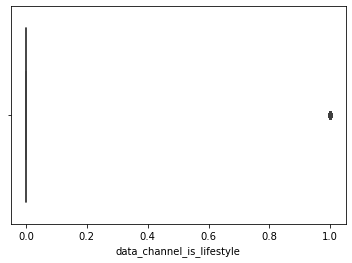

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


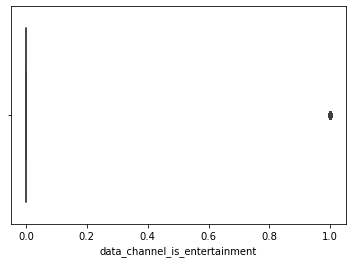

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


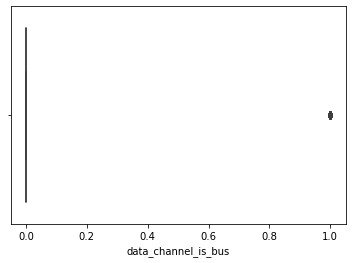

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


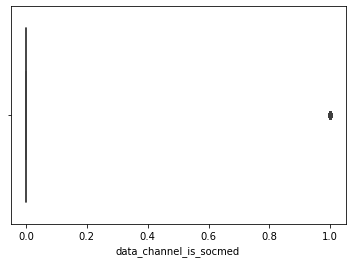

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


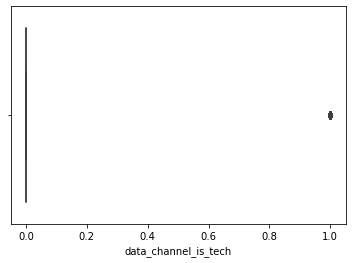

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


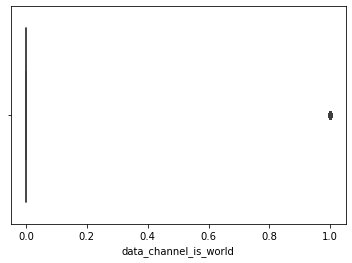

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


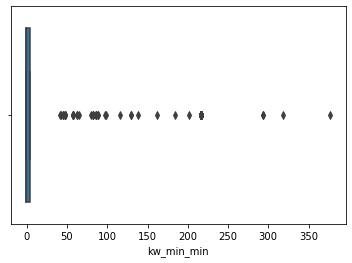

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


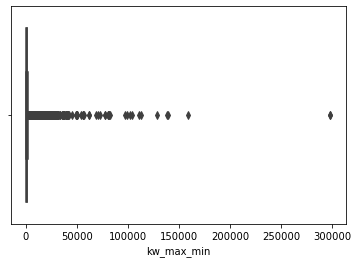

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


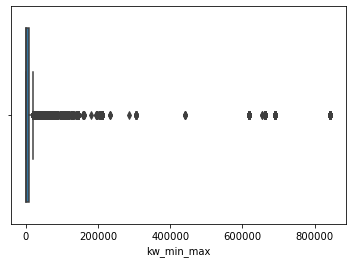

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


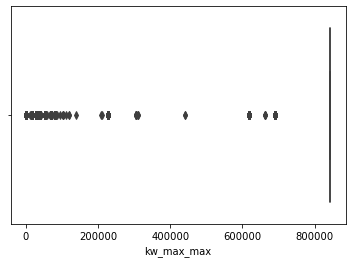

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


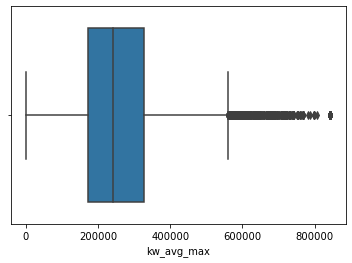

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


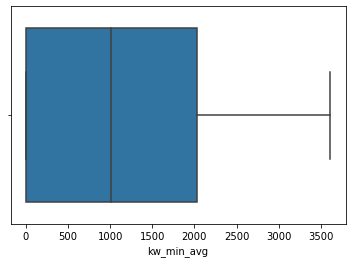

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


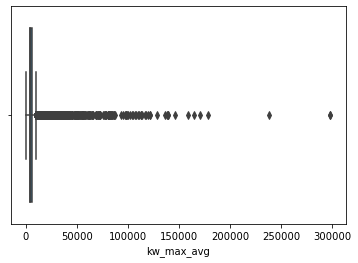

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


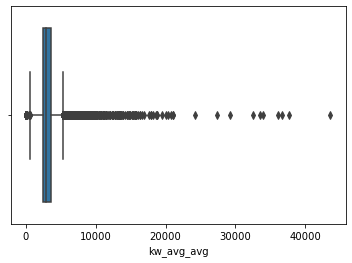

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


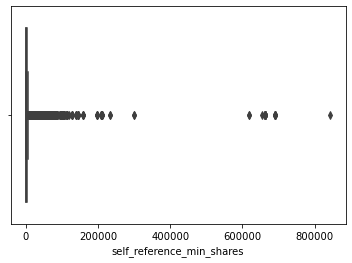

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


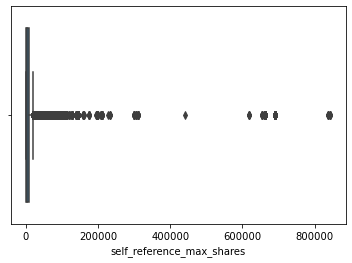

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


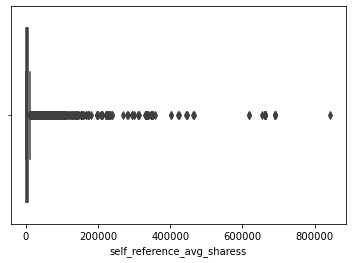

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


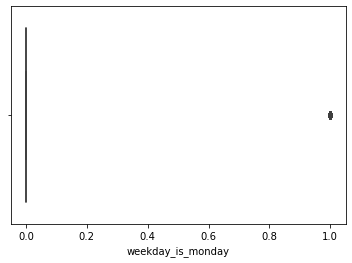

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


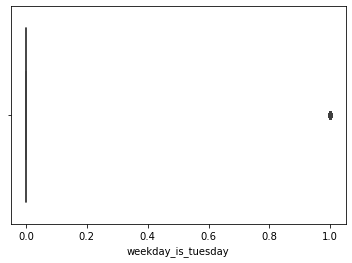

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


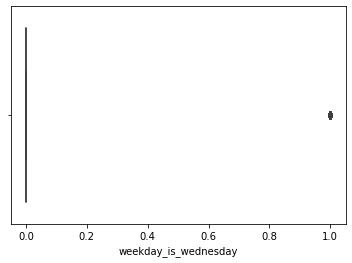

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


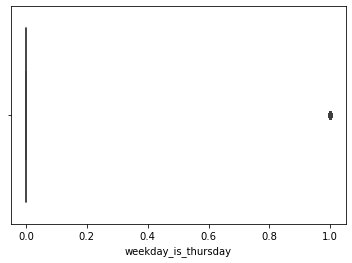

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


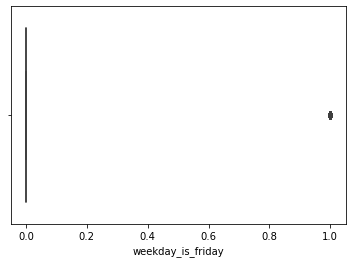

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


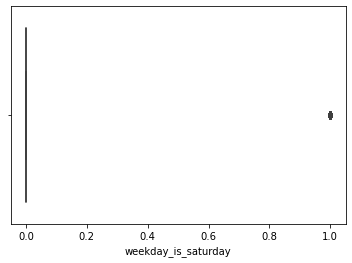

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


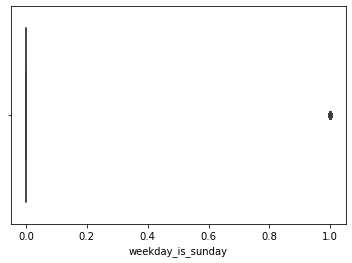

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


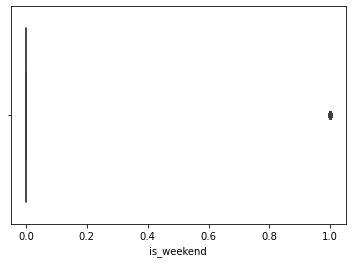

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


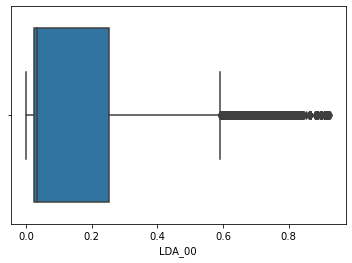

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


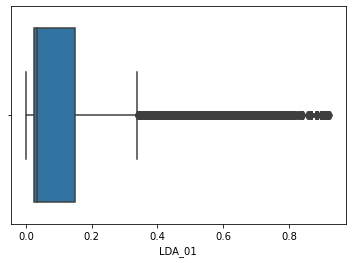

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


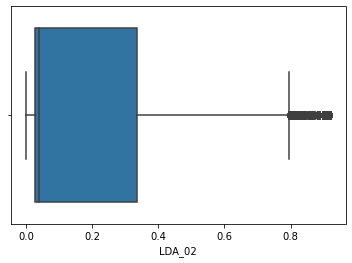

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


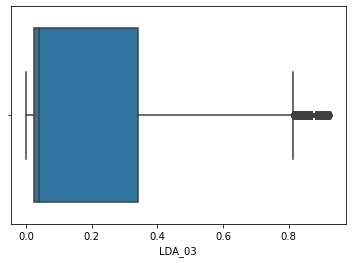

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


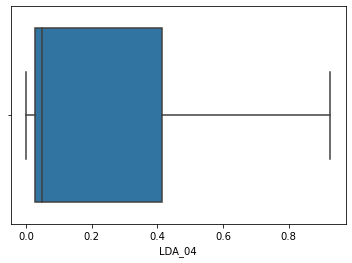

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


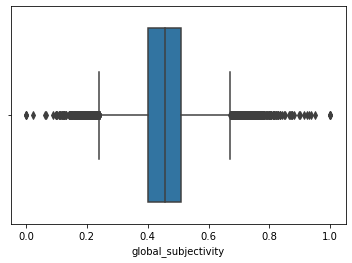

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


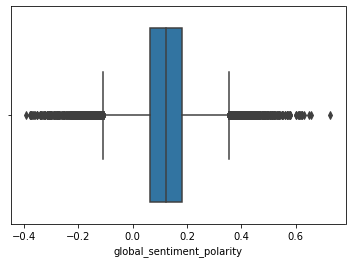

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


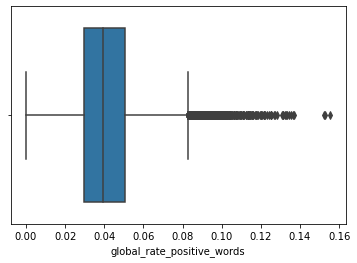

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


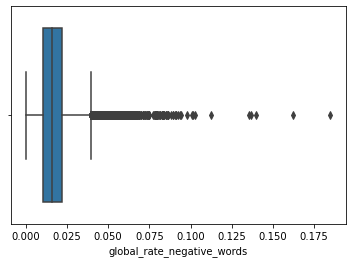

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


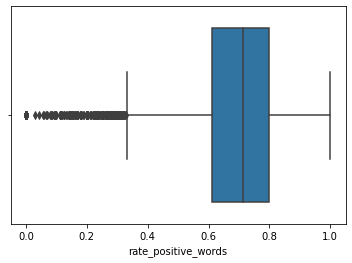

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


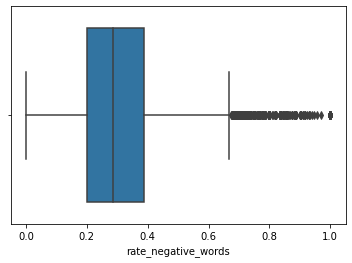

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


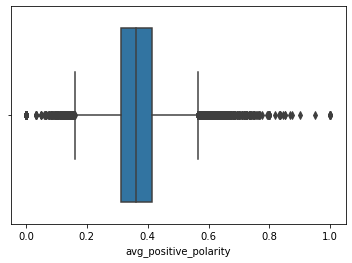

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


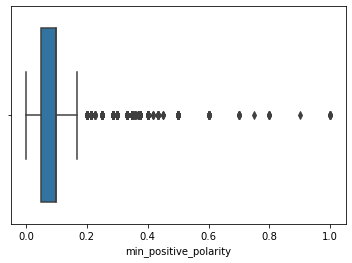

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


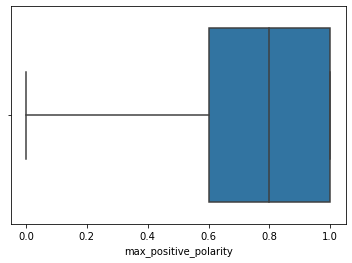

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


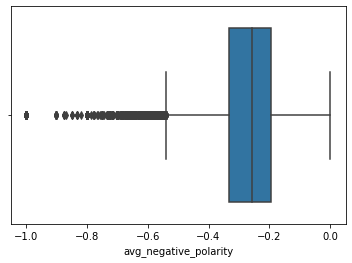

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


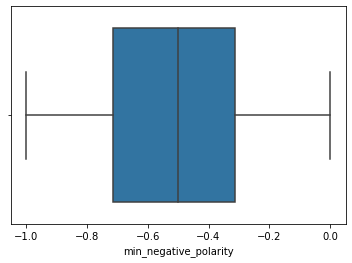

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


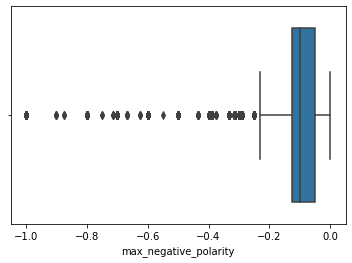

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


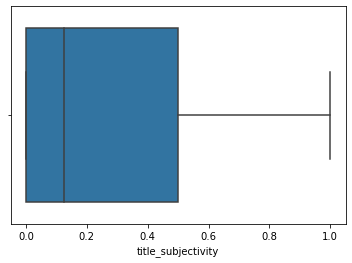

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


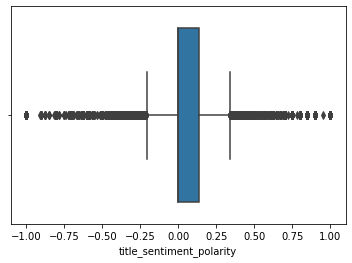

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


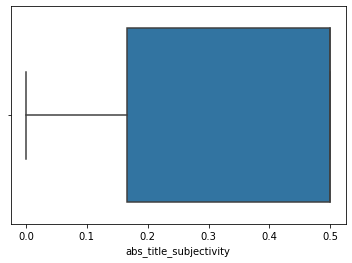

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


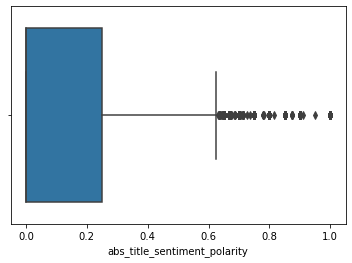

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


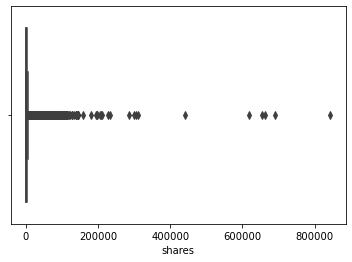

In [160]:
for col in onp.columns:
    sns.boxplot(onp[col])
    plt.show()

In [71]:
skewness = onp['shares'].skew()
kurtosis = onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 34.952836253385335
Kurtosis: 1909.9752124036713


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


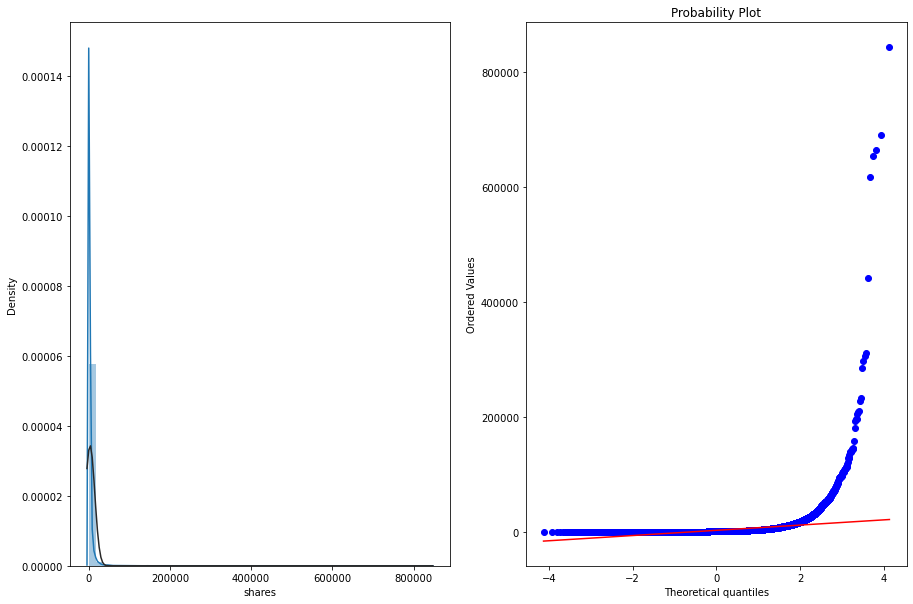

In [16]:
import scipy.stats as stats
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(onp['shares'], plot=plt)
plt.show()

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


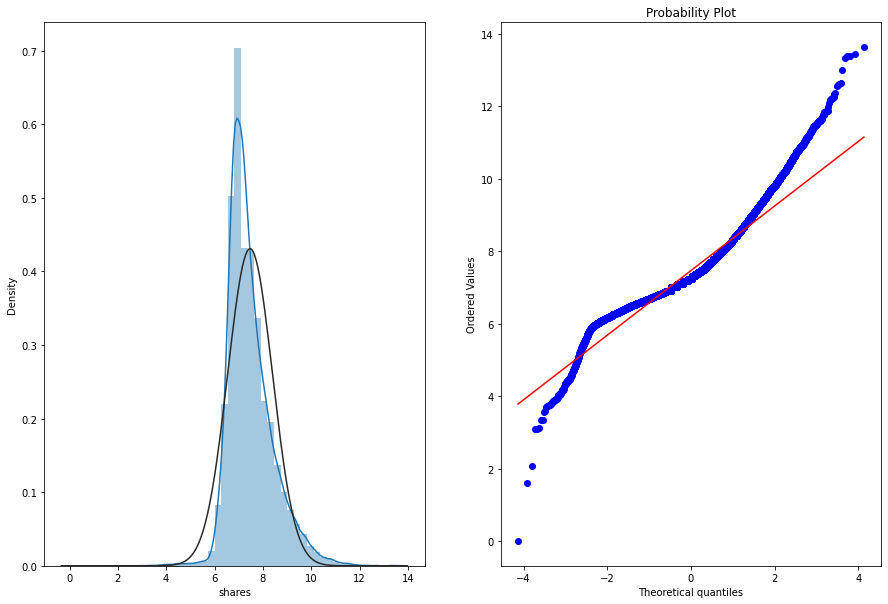

Skewness: 1.0205699456862518
Kurtosis: 2.4361575300553193


In [29]:
# Logarithmic Transformation for normal distrubition data

new_onp = onp.copy()
new_onp['shares'] = np.log(new_onp['shares'])
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(new_onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(new_onp['shares'], plot=plt)
plt.show()
skewness = new_onp['shares'].skew()
kurtosis = new_onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


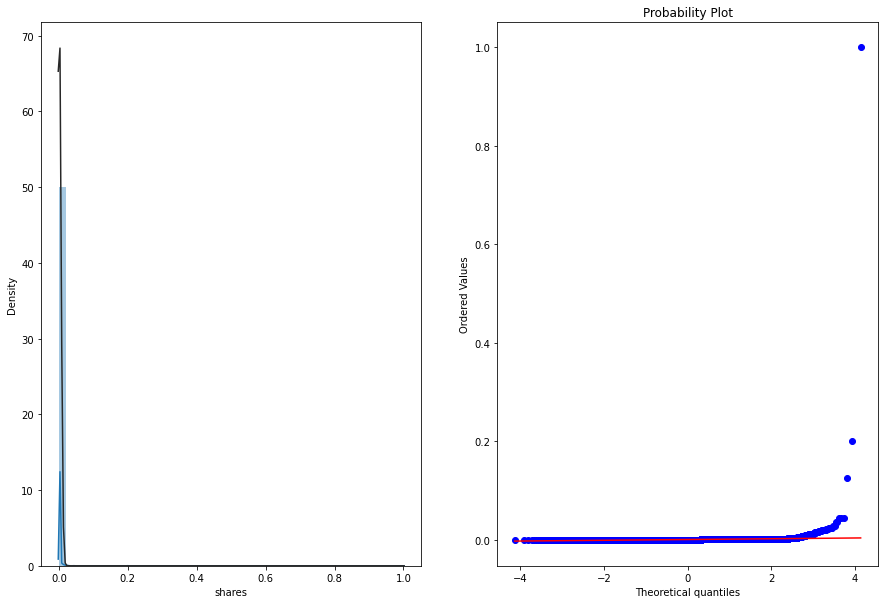

Skewness: 172.7636058788488
Kurtosis: 32087.959959990032


In [30]:
# Reciprocal Transformation for normal distrubition data

new_onp = onp.copy()
new_onp['shares'] = 1 / new_onp['shares']
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(new_onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(new_onp['shares'], plot=plt)
plt.show()
skewness = new_onp['shares'].skew()
kurtosis = new_onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


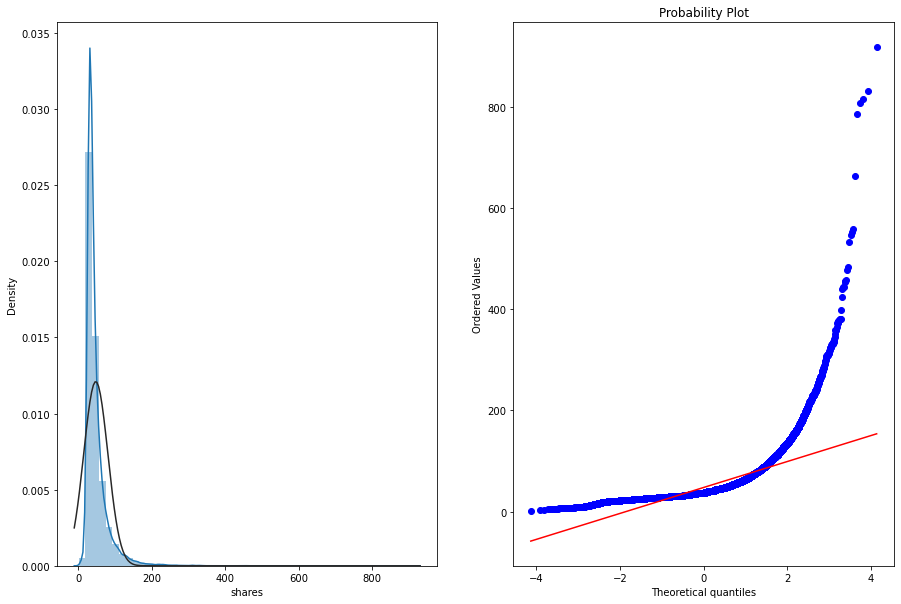

Skewness: 5.617315993586907
Kurtosis: 70.9202695762522


In [31]:
# Square Root Transformation for normal distrubition data

new_onp = onp.copy()
new_onp['shares'] = np.sqrt(new_onp['shares'])
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(new_onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(new_onp['shares'], plot=plt)
plt.show()
skewness = new_onp['shares'].skew()
kurtosis = new_onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


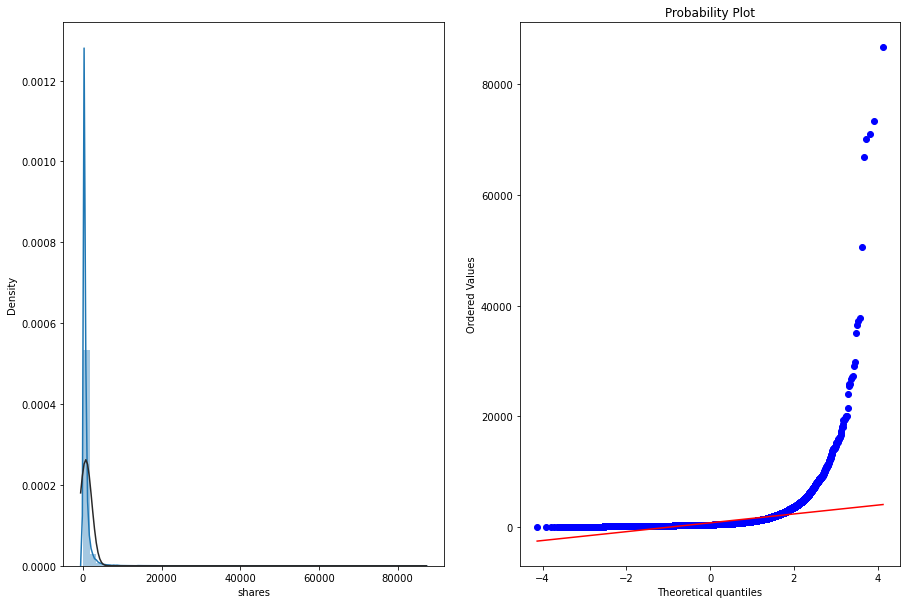

Skewness: 20.965950872757293
Kurtosis: 828.028972031676


In [32]:
# Exponential Transformation for normal distrubition data

new_onp = onp.copy()
new_onp['shares'] = new_onp['shares']**(1/1.2)
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(new_onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(new_onp['shares'], plot=plt)
plt.show()
skewness = new_onp['shares'].skew()
kurtosis = new_onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


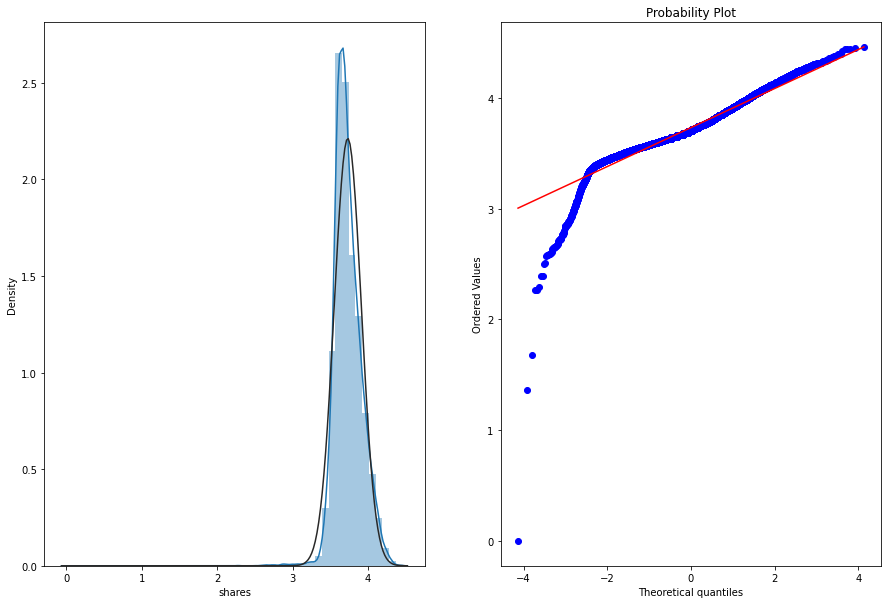

Skewness: -0.2509369309990456
Kurtosis: 8.222563042465973


In [33]:
# Box-Cox Transformation for normal distrubition data

new_onp = onp.copy()
new_onp['shares'], parameters = stats.boxcox(new_onp['shares'])
plt.figure(figsize=(15, 10))
plt.subplot(121), sns.distplot(new_onp['shares'], fit=stats.norm)
plt.subplot(122), stats.probplot(new_onp['shares'], plot=plt)
plt.show()
skewness = new_onp['shares'].skew()
kurtosis = new_onp['shares'].kurt()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [112]:
pd.set_option('display.max_columns', None)
onp

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
39639            11.0             346.0         0.529052        9.0   
39640            12.0             328.0         0.696296        9.0   
39641            10.0             442.0         0.516355       24.0   
39642             6.0             682.0         0.539493       10.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0       1.0         0.0              4.680365   
1                 1.0       1.0         0.0              4.913725   
2                 1.0       1.0         0.0              4.393365   
3                 0.0       1.0         0.0              4.404896   
4                19.0      20.0         0.0              4.682836   
...               ...       ...         ...                   ...   
39639             7.0       1.0         1.0              4.523121   
39640             7.0       3.0        48.0              4.405488   
39641             1.0      12.0         1.0              5.076923   
39642             1.0       1.0         0.0              4.975073   
39643             1.0       0.0         2.0              4.471338   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0               5.0                        0.0                            1.0   
1               4.0                        0.0                            0.0   
2               6.0                        0.0                            0.0   
3               7.0                        0.0                            1.0   
4               7.0                        0.0                            0.0   
...             ...                        ...                            ...   
39639           8.0                        0.0                            0.0   
39640           7.0                        0.0                            0.0   
39641           8.0                        0.0                            0.0   
39642           5.0                        0.0                            0.0   
39643           4.0                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                      0.0                     0.0                   0.0   
1                      1.0                     0.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   1.0   
...                    ...                     ...                   ...   
39639                  0.0                     0.0                   1.0   
39640                  0.0                     1.0                   0.0   
39641                  0.0                     0.0                   0.0   
39642                  0.0                     0.0                   0.0   
39643                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_min_max  kw_max_max  \
0                        0.0         0.0         0.0         0.0         0.0   
1                        0.0         0.0         0.0         0.0         0.0   
2                        0.0         0.0         0.0         0.0         0.0   
3                        0.0         0.0         0.0         0.0         0.0   
4                        0.0         0.

In [124]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

scaler = StandardScaler()
scaler_onp = onp.copy()
for col in onp.columns:
    if col not in cols:
        scaler_onp[col] = scaler.fit_transform(scaler_onp[col].values.reshape(-1, 1))

In [125]:
scaler_onp

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0            0.476190          0.023770         0.000783   0.013158   
1            0.333333          0.028027         0.000699   0.009868   
2            0.333333          0.022824         0.000657   0.009868   
3            0.333333          0.060667         0.000555   0.029605   
4            0.523810          0.124645         0.000429   0.062500   
...               ...               ...              ...        ...   
39639        0.428571          0.038789         0.000591   0.029605   
39640        0.476190          0.036660         0.000829   0.029605   
39641        0.380952          0.050142         0.000573   0.078947   
39642        0.190476          0.078524         0.000606   0.032895   
39643        0.380952          0.016438         0.000838   0.003289   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0            0.017241  0.007812    0.000000              0.243242   
1            0.008621  0.007812    0.000000              0.295782   
2            0.008621  0.007812    0.000000              0.178624   
3            0.000000  0.007812    0.000000              0.181220   
4            0.163793  0.156250    0.000000              0.243798   
...               ...       ...         ...                   ...   
39639        0.060345  0.007812    0.010989              0.207838   
39640        0.060345  0.023438    0.527473              0.181354   
39641        0.008621  0.093750    0.010989              0.332525   
39642        0.008621  0.007812    0.000000              0.309594   
39643        0.008621  0.000000    0.021978              0.196179   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0          0.444444                        0.0                            1.0   
1          0.333333                        0.0                            0.0   
2          0.555556                        0.0                            0.0   
3          0.666667                        0.0                            1.0   
4          0.666667                        0.0                            0.0   
...             ...                        ...                            ...   
39639      0.777778                        0.0                            0.0   
39640      0.666667                        0.0                            0.0   
39641      0.777778                        0.0                            0.0   
39642      0.444444                        0.0                            0.0   
39643      0.333333                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                      0.0                     0.0                   0.0   
1                      1.0                     0.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   1.0   
...                    ...                     ...                   ...   
39639                  0.0                     0.0                   1.0   
39640                  0.0                     1.0                   0.0   
39641                  0.0                     0.0                   0.0   
39642                  0.0                     0.0                   0.0   
39643                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_min_max  kw_max_max  \
0                        0.0    0.002646    0.000000    0.000000         0.0   
1                        0.0    0.002646    0.000000    0.000000         0.0   
2                        0.0    0.002646    0.000000    0.000000         0.0   
3                        0.0    0.002646    0.000000    0.000000         0.0   
4                        0.0    0.00264

### Part b)
Propose 5 different hypothesis tests related to the dataset. At least use 3 different tests.

In [106]:
# check data normality 
import scipy.stats as stats
from sklearn.preprocessing import normalize 

new_onp = onp.copy()
# new_onp = pd.DataFrame(normalize(new_onp), columns=new_onp.columns)
# new_onp['shares'] = normalize(new_onp['shares'].values.reshape(-1, 1))
new_onp['shares'] = np.log(new_onp['shares'])

def check_normality(df):
    H0 = 'data is Normally distributed'
    Ha = 'data is not Normally distributed'
    alpha = 0.05
    for col in df.columns:
        print("Shapiro Test Results of '{}'".format(col))
        p_value = stats.shapiro(df[col])[1]
        if p_value > alpha:
            print(f"{p_value} > {alpha}. We fail to reject Null Hypothesis. '{col}' {H0}")
        else:
            print(f"{p_value} <= {alpha}. We reject Null Hypothesis. '{col}' {Ha}")

check_normality(new_onp)
# new_onp

Shapiro Test Results of 'n_tokens_title'
0.0 <= 0.05. We reject Null Hypothesis. 'n_tokens_title' data is not Normally distributed
Shapiro Test Results of 'n_tokens_content'
0.0 <= 0.05. We reject Null Hypothesis. 'n_tokens_content' data is not Normally distributed
Shapiro Test Results of 'n_unique_tokens'
0.0 <= 0.05. We reject Null Hypothesis. 'n_unique_tokens' data is not Normally distributed
Shapiro Test Results of 'num_hrefs'
0.0 <= 0.05. We reject Null Hypothesis. 'num_hrefs' data is not Normally distributed
Shapiro Test Results of 'num_self_hrefs'
0.0 <= 0.05. We reject Null Hypothesis. 'num_self_hrefs' data is not Normally distributed
Shapiro Test Results of 'num_imgs'
0.0 <= 0.05. We reject Null Hypothesis. 'num_imgs' data is not Normally distributed
Shapiro Test Results of 'num_videos'
0.0 <= 0.05. We reject Null Hypothesis. 'num_videos' data is not Normally distributed
Shapiro Test Results of 'average_token_length'
0.0 <= 0.05. We reject Null Hypothesis. 'average_token_lengt

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [192]:
from sklearn.model_selection import train_test_split
onp_x, onp_y = scaler_onp.values[:, :-1], scaler_onp.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(onp_x, onp_y, test_size=0.2, random_state=42)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 20, cv=10, direction ='forward')
sfs_selector.fit(x_train, y_train)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(),
                          n_features_to_select=20)

In [200]:
a = list(sfs_selector.get_support())
a.append(False)
feature_select = scaler_onp.columns[a]
feature_select

Index(['num_self_hrefs', 'num_imgs', 'average_token_length', 'num_keywords',
       'data_channel_is_entertainment', 'kw_min_min', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_avg_sharess',
       'weekday_is_monday', 'is_weekend', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_rate_positive_words',
       'min_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity'],
      dtype='object')

In [202]:
selected_onp = scaler_onp[feature_select].copy()
onp_x, onp_y = selected_onp.values, scaler_onp.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(onp_x, onp_y, test_size=0.2, random_state=42)

lr = LinearRegression()
# rfe_selector.get_support()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)
# y_pred = lr.predict(x_test)
# acc = np.mean(y_pred == y_test)
# acc
# x_train
# scaler_onp[feature_select]
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

0.012343517004426818

In [58]:
import scipy.stats as stats
for i in range(onp_x.shape[1]):
    t_stat, p_value = stats.ttest_1samp(lr.coef_[i], popmean=0)
    print(t_stat, p_value)

55

### Part c)
Try Ridge and Lasso regression.

### Part d)
Use various scaling methods and report their effects.

### Part e)
Add polynomial features and report their effect.

### Part f)
Try using GridSearchCV with RandomizedSearchCV to tune your model’s hyperparameters. (Extra Point)

### Part g)
Apply the feature selection methods that you have implemented in the above sections.

### Part h)
Get familiar with and implement the following loss functions from scratch and utilize them with a Linear Regression model and discuss their effect on the performance of the model. (Extra Point)
1. Absolute Error
2. Epsilon-sensetive error
3. Huber

In [ ]:
# Your code for first problem

After each cell, you should explain your entire code. Please consider clean code in cells too and use comments if you should

## Conclusion for this problem
Write a conclusion and references which you've used in your homework